#  The Spark Foundation : GRIP- TSF April 2021

## Task  :   Prediction using Decision Tree

## Author: Nitin Saini

### Objectives:
● Create the Decision Tree classifier and visualize it graphically.

● if we feed any new data to this classifier, it would be able to predict the right class accordingly.

## Step 1 : Data Preprocessing

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Loading Data

In [2]:
iris = pd.read_csv('Iris.csv')
iris

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


### Check if any null values in dataset

In [3]:
iris.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [4]:
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


### Count the number of species in dataset

In [5]:
iris.Species.value_counts()

Iris-setosa        50
Iris-virginica     50
Iris-versicolor    50
Name: Species, dtype: int64

In [6]:
iris.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


## Step 2 Exploratory Data Analysis 

### Countplot : 

This show us that our dataset is balanced with equal records for all three species.

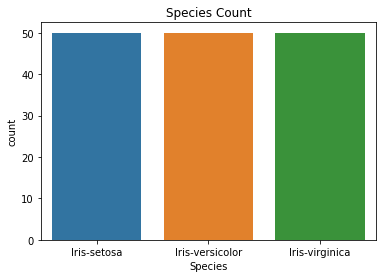

In [7]:
plt.title('Species Count')
sns.countplot(iris['Species']);

### Now let's Compare between Sepal length and width on basis of species using ScatterPlot

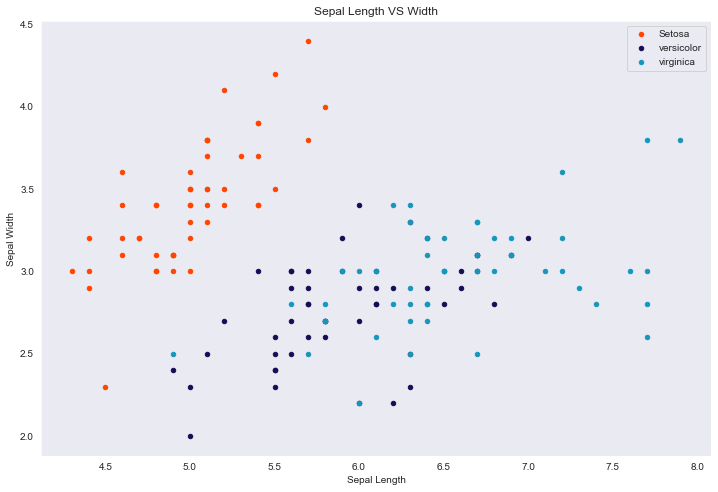

In [22]:
fig = iris[iris.Species=='Iris-setosa'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='#FF4500', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='#150e56', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot(kind='scatter',x='SepalLengthCm',y='SepalWidthCm',color='#1597bb', label='virginica', ax=fig)
fig.set_xlabel("Sepal Length")
fig.set_ylabel("Sepal Width")
fig.set_title("Sepal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.set_style("dark")
plt.show()

 From the above visualization, we can tell that the iris-setosa species has smaller sepal length but higher width. While we see Versicolor lies in almost middle for length as well as width. While Virginica has larger sepal lengths and smaller sepal widths.

### Let's compare the Petal length and width columns using Scatterplot

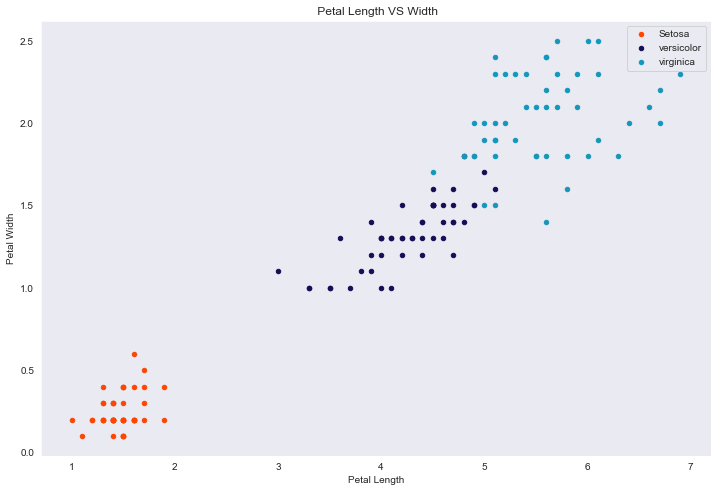

In [9]:
fig = iris[iris.Species=='Iris-setosa'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='#FF4500', label='Setosa')
iris[iris.Species=='Iris-versicolor'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='#150e56', label='versicolor',ax=fig)
iris[iris.Species=='Iris-virginica'].plot.scatter(x='PetalLengthCm',y='PetalWidthCm',color='#1597bb', label='virginica', ax=fig)
fig.set_xlabel("Petal Length")
fig.set_ylabel("Petal Width")
fig.set_title(" Petal Length VS Width")
fig=plt.gcf()
fig.set_size_inches(12,8)
sns.set_style("dark")
plt.show()

From above Visuliazation we can tell that Setosa has the smallest petal length as well as petal widths, while Versicolor has average petal length and petal width while the virginica species has the highest petal length as well as petal width.

### Correlation between the features

In [10]:
iris.corr()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
Id,1.000000,0.716676,-0.397729,0.882747,0.899759
SepalLengthCm,0.716676,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.397729,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.882747,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.899759,0.817954,-0.356544,0.962757,1.000000


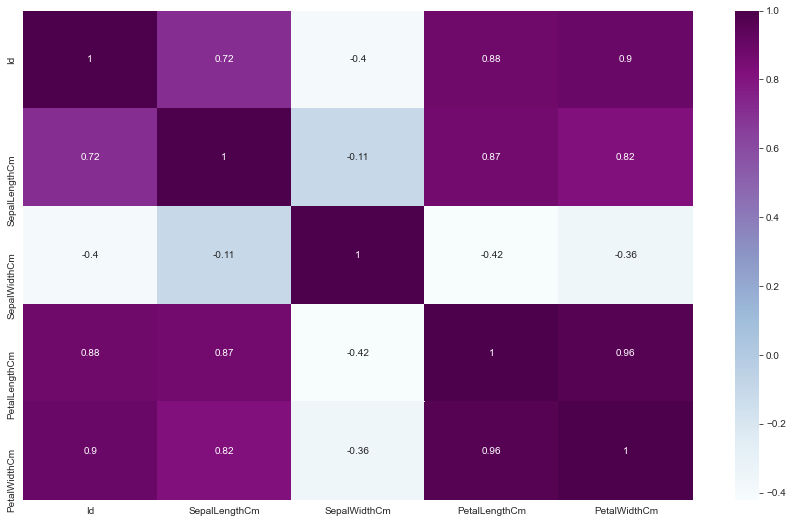

In [11]:
fig = plt.figure(figsize = (15,9))
sns.heatmap(iris.corr(), cmap='BuPu', annot = True);

### Visualize the distribution using Boxplot

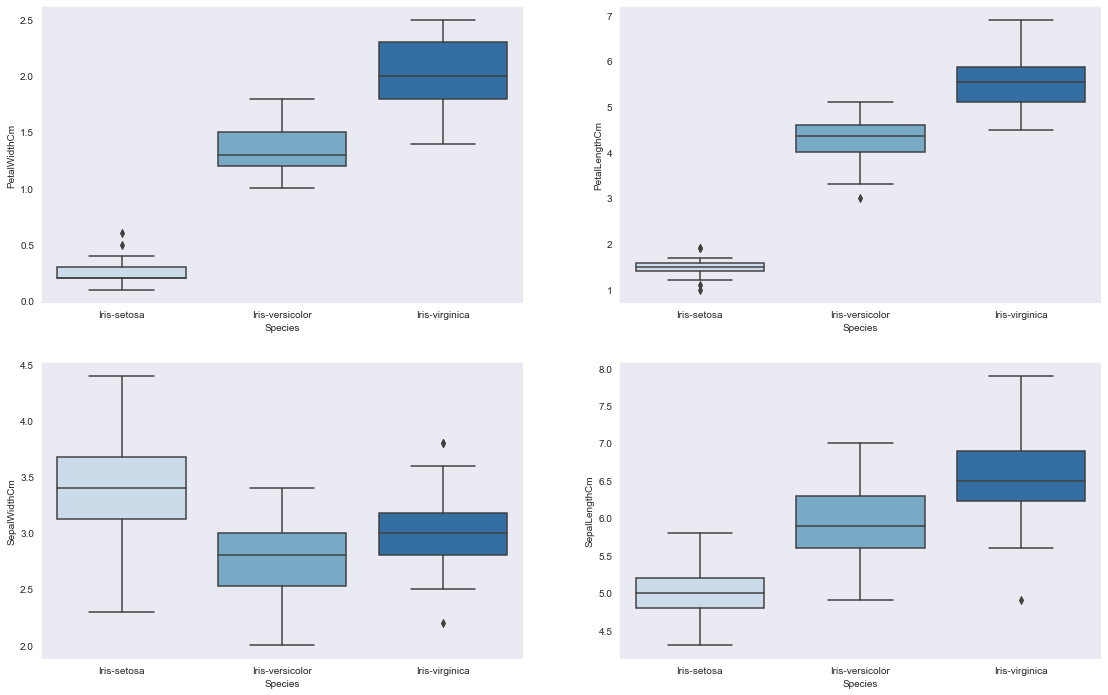

In [12]:
fig, axes = plt.subplots(2, 2, figsize=(19,12))
sns.boxplot(  y="PetalWidthCm", x= "Species", data=iris ,palette="Blues", orient='v' , ax=axes[0, 0] )
sns.boxplot(  y="PetalLengthCm", x= "Species", data=iris ,palette="Blues", orient='v' , ax=axes[0, 1])
sns.boxplot(  y="SepalWidthCm", x= "Species", data=iris ,palette="Blues", orient='v' , ax=axes[1, 0])
sns.boxplot(  y="SepalLengthCm", x= "Species", data=iris ,palette="Blues", orient='v' , ax=axes[1, 1])
plt.show()

From Above Visualisation We can tell that: 

● Setosa usually has smaller features with few outliers.

● Versicolor species has average features

● Virginica species has the longest features widths and lengths as compared to others

## Step 3 Machine Learning Model

### Import required Libraries for buliding Model  

In [13]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from IPython.display import Image
from sklearn import tree
import pydotplus

### Extract target variables and features from dataset

In [14]:
X = iris.drop('Species', axis=1).iloc[:,1:]
y = iris['Species'].replace('Iris-setosa',0).replace('Iris-versicolor',1).replace('Iris-virginica',2)

In [15]:
print(X)

     SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
0              5.1           3.5            1.4           0.2
1              4.9           3.0            1.4           0.2
2              4.7           3.2            1.3           0.2
3              4.6           3.1            1.5           0.2
4              5.0           3.6            1.4           0.2
..             ...           ...            ...           ...
145            6.7           3.0            5.2           2.3
146            6.3           2.5            5.0           1.9
147            6.5           3.0            5.2           2.0
148            6.2           3.4            5.4           2.3
149            5.9           3.0            5.1           1.8

[150 rows x 4 columns]


In [16]:
print(y)

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: Species, Length: 150, dtype: int64


### Applying DecisionTreeClassifier to classify species

In [17]:
model= DecisionTreeClassifier(max_depth = 4, max_features=2)
model.fit(X,y)

DecisionTreeClassifier(max_depth=4, max_features=2)

## Now plot the Decision tree model using graphviz

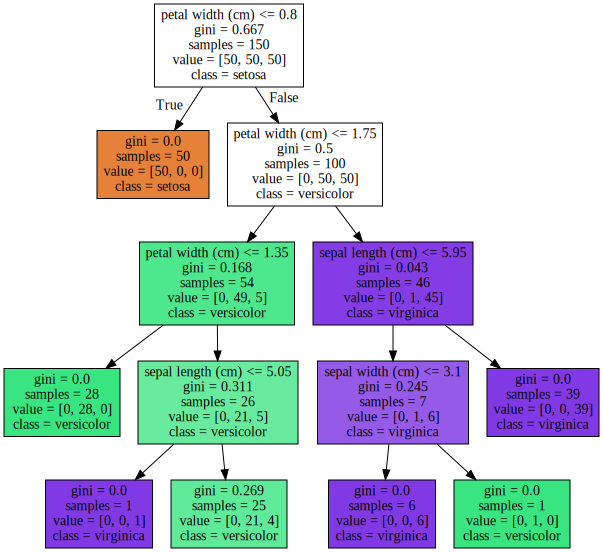

In [18]:
import graphviz
# DOT data
fn=['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn=['setosa', 'versicolor', 'virginica']
dot_data = tree.export_graphviz(model, out_file=None, 
                                feature_names=fn,  
                                class_names=cn,
                                filled=True)

# Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph

### Confusion matrix to see if model fits to given data and predict the right class of the trained features

Text(0.5, 1.0, 'Confusion matrix')

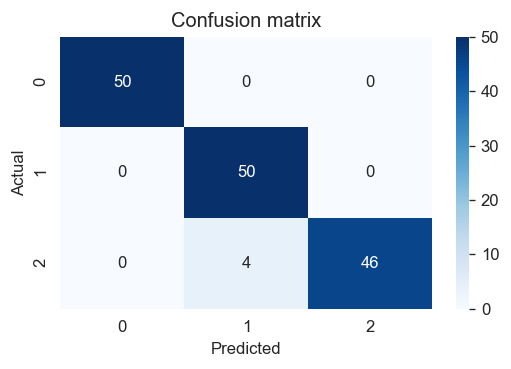

In [19]:
y_pred=model.predict(X)
cm = confusion_matrix(y, y_pred)
plt.figure(figsize=(5,3), dpi=120)
ax=plt.subplot()
sns.heatmap(cm, annot=True, ax=ax, cmap= 'Blues')
ax.set_xlabel('Predicted')
ax.set_ylabel('Actual')
ax.set_title('Confusion matrix')

### Applying Model to new values to predict the right class accordingly 

In [20]:
def decision(x):
    y1=model.predict(np.array(x).reshape(1,-1))
    if y1==0:
        print('Iris-setosa')
    elif y1==1:
        print('Iris-versicolor')
    elif y1==2:
        print('Iris-virginica')

In [25]:
x1 = [7,3.2,4.7,0.5]
decision(x1)


Iris-setosa
